In [1]:
import pymysql                                  #connsessione al Database
import sqlalchemy
import dotenv
import os
import pandas as pd

from sqlalchemy import create_engine, text

dotenv.load_dotenv(dotenv_path="../Jupyter/.env",override=True)

username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine =  sqlalchemy.create_engine(conn_string)

query = """SELECT *
           FROM dimcustomer"""

df = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [2]:
df

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,Ruben,None,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,None,Christy,None,Zhu,0,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,None,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,None,Elizabeth,None,Johnson,0,1979-08-05,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,None,1 (11) 500 555-0131,2011-01-23,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,AW00029479,None,Tommy,L,Tang,0,1969-06-30,M,...,Clerical,Administrativo,Employé,1,0,"111, rue Maillard",None,1 (11) 500 555-0136,2012-09-04,0-1 Miles
18480,29480,248,AW00029480,None,Nina,W,Raji,0,1977-05-06,S,...,Clerical,Administrativo,Employé,1,0,9 Katherine Drive,None,1 (11) 500 555-0146,2013-07-17,0-1 Miles
18481,29481,120,AW00029481,None,Ivan,None,Suri,0,1965-07-04,S,...,Clerical,Administrativo,Employé,0,0,Knaackstr 4,None,1 (11) 500 555-0144,2011-08-13,0-1 Miles
18482,29482,179,AW00029482,None,Clayton,None,Zhang,0,1964-09-01,M,...,Clerical,Administrativo,Employé,1,0,"1080, quai de Grenelle",None,1 (11) 500 555-0137,2012-09-18,0-1 Miles


In [3]:
#Esplorazione Df
query = """SELECT *
           FROM dimproduct"""

df = pd.read_sql(sqlalchemy.text(query), db_engine.connect())
print(df.info(),"\n")
print(df.shape,"\n")
print(df.columns,"\n")
print(df.index,"\n")
print("Datatypes:\n","\n",df.dtypes,"\n")
print("PRIME 10 RIGHE:\n",df.head(10))
print("ULTIME 10 RICGHE:\n",df.tail(10))
print("5 RIGHE CASUALI:\n",df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             606 non-null    int64         
 1   ProductAlternateKey    606 non-null    object        
 2   ProductSubcategoryKey  397 non-null    float64       
 3   WeightUnitMeasureCode  282 non-null    object        
 4   SizeUnitMeasureCode    253 non-null    object        
 5   EnglishProductName     606 non-null    object        
 6   SpanishProductName     606 non-null    object        
 7   FrenchProductName      606 non-null    object        
 8   StandardCost           397 non-null    float64       
 9   FinishedGoodsFlag      606 non-null    int64         
 10  Color                  606 non-null    object        
 11  SafetyStockLevel       606 non-null    int64         
 12  ReorderPoint           606 non-null    int64         
 13  ListP

In [4]:
print("COLORI DISPONIBILI:","\n",df.loc[:,["Color"]])   #colori disponibili

COLORI DISPONIBILI: 
      Color
0       NA
1       NA
2       NA
3       NA
4       NA
..     ...
601     NA
602     NA
603  Black
604  Black
605  Black

[606 rows x 1 columns]


In [5]:
df.loc[:,["Weight"]]


,Weight
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
601,168.00
602,170.00
603,19.77
604,20.13


In [6]:
peso=df.loc[:,["Weight"]]
pesanti=peso>100
print("#media peso prodotto:",peso.mean(),"\n")   #media del peso dei prodotti
print("#più leggero:",peso.min(),"\n")            #meno pesante
print("#più pesante:",peso.max(),"\n")            #il più pesante
print("#olte 100kg:",pesanti.value_counts())      #conta dei prodotti più pesanti di 100kg


#media peso prodotto: Weight    56.193227
dtype: float64 

#più leggero: Weight    2.12
dtype: float64 

#più pesante: Weight    1050.0
dtype: float64 

#olte 100kg: Weight
False     578
True       28
dtype: int64


In [7]:
df_x=df["DealerPrice"].sort_index(axis=0,                                 #prezzi in ordine
                        level=None,
                        ascending=False,
                        inplace=False,
                        sort_remaining=False,
                        key=None)

df_x.dropna(how="all",axis=0)                                              #rimozione dei valori nulli
print("25%=",df_x.count()/4,"prodotti\n")                                  #calcolo il 25% dei valori

df_x.describe()                                                            #visualizzo il range del 25%
                                                                           #dei più costosi

25%= 98.75 prodotti



count     395.000000
mean      448.597060
std       503.225071
min         1.374000
25%        41.994000
50%       218.454000
75%       722.594900
max      2146.962000
Name: DealerPrice, dtype: float64

In [8]:
print(df.columns)

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')


In [9]:
#filtro prodotti blu
query = """SELECT Color,StandardCost                             
           FROM dimproduct 
           WHERE Color='Blue'"""                                   

df_blue = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [10]:
#media costo prodotti blu
print("I prodotti di colore blu in media costano:",df_blue["StandardCost"].mean().round(),"$")

I prodotti di colore blu in media costano: 528.0 $


In [11]:
#filtro prodotti neri o rossi
query = """SELECT Color,StandardCost 
           FROM dimproduct
           WHERE Color='Black' or Color='Red'"""                  
df_r_b = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [12]:
#media costo prodotti neri e rossi
print("I prodotti di colore nero e rosso, in media costano:",df_r_b["StandardCost"].mean().round(),"$")

I prodotti di colore nero e rosso, in media costano: 537.0 $


In [13]:
query = """SELECT Size, Weight,StandardCost
           FROM dimproduct
           WHERE Weight>10 and Size=42"""

df_sw = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [14]:
print("Costo medio prodotti taglia 42, oltre i 10KG:",df_sw["StandardCost"].mean().round(),"$")

Costo medio prodotti taglia 42, oltre i 10KG: 998.0 $


In [15]:
#filtro peso >10, taglia=42 e colore argento
query = """SELECT EnglishProductName,StandardCost,Weight,Size
           FROM dimproduct
           WHERE Weight>10 and Size=42 and Color='Silver'"""

df_y = pd.read_sql(sqlalchemy.text(query), db_engine.connect())

In [16]:
df_y

,EnglishProductName,StandardCost,Weight,Size
0,"Mountain-100 Silver, 42",1912.15,20.77,42
1,"Mountain-200 Silver, 42",1117.86,23.77,42
2,"Mountain-200 Silver, 42",1265.62,23.77,42
3,"Mountain-400-W Silver, 42",419.78,27.13,42
4,"Mountain-500 Silver, 42",308.22,27.77,42


In [17]:
#confronto pattern prezzo venditore/acquirente negli ultime 20 posizioni 
query = """SELECT StandardCost, DealerPrice                       
           FROM dimproduct"""                                    

df_diff= pd.read_sql(sqlalchemy.text(query), db_engine.connect())
ultimi20=df_diff.tail(20)

<Axes: >

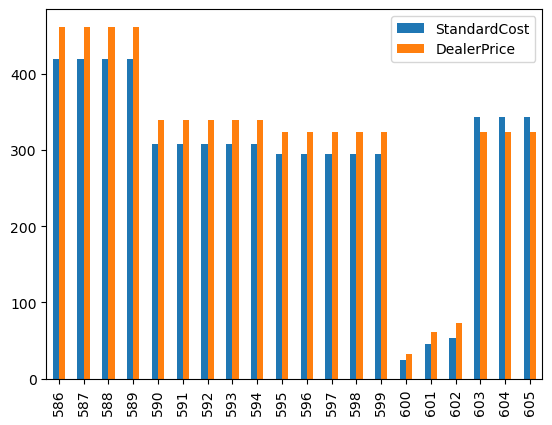

In [18]:
ultimi20.plot( kind= "bar")

In [19]:
 #connessione al dataset amazon.csv 

import pandas as pd                                                                                      
check=pd.read_csv(filepath_or_buffer="../Jupyter/dati py epicode/archive/beginner_datasets/amazon.csv")  

In [20]:
#overview
print(check.shape,"\n")
print(check.sample(10),"\n","\n")
print(check.columns,"\n")
print(check.Positive.value_counts(),"\n")

(20000, 2) 

                                              reviewText  Positive
18459  watch tophatvideos on youtube and you will get...         1
14042  HTC Inspire. Great little app for exploring yo...         1
1915   This app would not function properly on my Ain...         0
17190  If you like shopping with QVC....you will be v...         1
13426  As stated by others, needs ICS support. Force ...         0
1687   There's always a question of function when rel...         1
19645  This cracked screen prank is pretty realistic....         1
15311  Reliable, digs out all the stations and can re...         1
10648  Love this app! Every time I have contacted the...         1
16776  this waste of time is not an app at all. It ju...         0 
 

Index(['reviewText', 'Positive'], dtype='object') 

1    15233
0     4767
Name: Positive, dtype: int64 



In [21]:
#connesione al dataset diabetes.csv

dataset_path="../Jupyter/dati py epicode/archive/beginner_datasets/"     
dataset_name="diabetes.csv"
path=dataset_path+dataset_name
diabetes=pd.read_csv(path)

In [22]:
print(diabetes.shape,"\n")         #overview sui dati
print(diabetes.columns,"\n")
print(diabetes.dtypes,"\n")
print(diabetes.describe(),"\n")

(768, 9) 

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object') 

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)

In [49]:
 #filtri per fasce d'età

f0_20=diabetes["Age (years)"]<20                                      
f20_30=(20<diabetes["Age (years)"]) & (diabetes["Age (years)"]<30)
f30_40=(30<diabetes["Age (years)"]) & (diabetes["Age (years)"]<40)
f40_50=(40<diabetes["Age (years)"]) & (diabetes["Age (years)"]<50)
f50=diabetes["Age (years)"]>50


print(diabetes.loc[f40_50])

     Number of times pregnant  \
22                          7   
25                         10   
26                          7   
34                         10   
37                          9   
..                        ...   
743                         9   
745                        12   
754                         8   
761                         9   
766                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
22                                                 196                          
25                                                 125                          
26                                                 147                          
34                                                 122                          
37                                                 102                          
..                                                 ...                          
743                                 

In [24]:
print("media dai 0 a 20:",diabetes.loc[f0_20,'Diastolic blood pressure (mm Hg)'].mean())
print("media dai 20 a 30:",diabetes.loc[f20_30,'Diastolic blood pressure (mm Hg)'].mean())
print("media dai 30 a 40:",diabetes.loc[f30_40,'Diastolic blood pressure (mm Hg)'].mean())
print("media dai 40 a 50:",diabetes.loc[f40_50,'Diastolic blood pressure (mm Hg)'].mean())
print("media oltre i 50:",diabetes.loc[f50,'Diastolic blood pressure (mm Hg)'].mean())

media dai 0 a 20: nan
media dai 20 a 30: 65.34848484848484
media dai 30 a 40: 70.36805555555556
media dai 40 a 50: 74.52380952380952
media oltre i 50: 78.38271604938272


In [25]:
diabetes.groupby("Age (years)")['Diastolic blood pressure (mm Hg)'].mean()     #media della p.s.d. per ogni 
                                                                               # anno d'età presente

Age (years)
21    65.936508
22    63.722222
23    64.315789
24    64.956522
25    59.666667
26    64.181818
27    73.500000
28    68.314286
29    68.241379
30    64.857143
31    64.375000
32    70.062500
33    65.647059
34    74.000000
35    75.600000
36    69.125000
37    75.947368
38    71.125000
39    72.666667
40    69.230769
41    67.590909
42    73.388889
43    78.461538
44    61.750000
45    83.066667
46    76.000000
47    78.333333
48    78.400000
49    81.400000
50    78.250000
51    84.500000
52    81.500000
53    79.000000
54    89.333333
55    70.250000
56    76.333333
57    76.800000
58    78.285714
59    74.000000
60    80.000000
61    76.000000
62    71.500000
63    78.000000
64    78.000000
65    78.666667
66    86.000000
67    72.666667
68    82.000000
69    81.000000
70    82.000000
72     0.000000
81    74.000000
Name: Diastolic blood pressure (mm Hg), dtype: float64

In [26]:
#connessione al dataset insurance.csv
import pandas as pd
ins=pd.read_csv("../Jupyter/dati py epicode/archive/beginner_datasets/insurance.csv")

In [27]:
#overview sui dati

print(ins.shape,"\n")
print(ins.columns,"\n")
print(ins.head(),"\n")
print(ins.dtypes,"\n")
print(ins.nunique(),"\n")

(1338, 7) 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object') 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64 



In [28]:
ins.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
#media dei premi pagati per regione
reg=ins.groupby("region")   
reg.charges.mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [30]:
filtrosw= ins.region =="southwest"   #filtro southwest
querysw= ins.loc[filtrosw]
querysw.charges.mean()               #media


12346.937377292308

In [31]:
smok =ins.groupby("smoker")   #filto fumatori
smok.charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [32]:
gen= ins.groupby("sex")   #filtro sesso  
gen.charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [33]:
bmid=ins.bmi.describe()  #view descrittiva della colonna "bmi"
bmid

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [34]:
a="min"                                               #calcolo media,min,max di charges
b="25%"                                               #in realzione ai quartili di bm1

filtro_bmi=(bmid[a]<ins.bmi) & (ins.bmi<bmid[b])      #filtro per il primo q.
querybmi= ins.loc[filtro_bmi]                         #dal minimo al 25%
print("primo quartile")
print("media:",querybmi.charges.mean())
print("minimo:",querybmi.charges.min())
print("massimo:",querybmi.charges.max())

primo quartile
media: 10386.608533353294
minimo: 1121.8739
massimo: 38245.59327


In [35]:
c="25%"                                             
d="50%"

filtro_bmi=(bmid[c]<ins.bmi) & (ins.bmi<bmid[d])    #filtro secondo quartile
querybmi= ins.loc[filtro_bmi]                       #dal 25% al 50% di bmi
print("secondo quartile")
print("media:",querybmi.charges.mean())
print("minimo:",querybmi.charges.min())
print("massimo:",querybmi.charges.max())


secondo quartile
media: 11398.362224261262
minimo: 1131.5066
massimo: 62592.87309


In [36]:
e="50%"
f="75%"

filtro_bmi=(bmid[e]<ins.bmi) & (ins.bmi<bmid[f])
querybmi= ins.loc[filtro_bmi]
print("terzo quartile")
print("media:",querybmi.charges.mean())
print("minimo:",querybmi.charges.min())
print("massimo:",querybmi.charges.max())


terzo quartile
media: 14358.17308081818
minimo: 1135.9407
massimo: 60021.39897


In [37]:
g="75%"
h="max"

filtro_bmi=(bmid[g]<ins.bmi) & (ins.bmi<bmid[h])
querybmi= ins.loc[filtro_bmi]
print("quarto quartile")
print("media:",querybmi.charges.mean())
print("minimo:",querybmi.charges.min())
print("massimo:",querybmi.charges.max())


quarto quartile
media: 17035.315355598803
minimo: 1141.4451
massimo: 63770.42801


**POKEMON.CSV**

In [38]:
dataset_path="../Jupyter/dati py epicode/archive/beginner_datasets/"   # connesione al dataset
dataset_name="pokemon.csv"                                             #pokemon.csv
path=dataset_path+dataset_name
pok=pd.read_csv(path)
pok

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [39]:
print(pok.info())  #overview del DataFrame
pok.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [40]:
dupi=pok.loc[pok.duplicated(subset="#")]      #la prima colonna contiene valori duplicati
dupi.loc[:,"#"]                               #e singolarmente non è indicizzabile

3        3
7        6
8        6
12       9
19      15
      ... 
785    711
786    711
787    711
796    719
798    720
Name: #, Length: 79, dtype: int64

In [41]:
legend=pok["Legendary"]  == True     #filtro pokemon leggendari
pok.loc[legend]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [42]:
f_grass=pok["Type 1"] == "Grass"     #filtro pokemon tipo erba
pok.loc[f_grass]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,405,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False


In [43]:
legend=pok["Legendary"]  == True        #pokemon leggendari,
f_ice= pok["Type 1"]  == "Ice"          #di tipo ghiaccio o fuoco
f_fire= pok["Type 1"]  == "Fire"
f_comleto= legend & (f_ice | f_fire) 
pok.loc[f_comleto]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
542,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [44]:
pok.set_index("Name")    #impostazione di "Name" come indice

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [46]:
f_gen= pok.Generation = 1          #filtro generazione
f_attack= pok.Attack > 50          #attacco
f_hp= pok.HP < 60                  #hp 
pok.loc[f_gen & f_attack & f_hp]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
24,19,Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False
25,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,1,False
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,1,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,1,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,1,True


In [45]:
a="min"
b="25%"

filtro_bmi=(bmid[a]<ins.bmi) & (ins.bmi<bmid[b])
querybmi= ins.loc[filtro_bmi]
print("primo quartile")
print("media:",querybmi.charges.mean())
print("minimo:",querybmi.charges.min())
print("massimo:",querybmi.charges.max())

primo quartile
media: 10386.608533353294
minimo: 1121.8739
massimo: 38245.59327
